# Machine Learning: No deep Learning

This lesson presents non-deep learning based models: the basic ideas, the mathematical derivations and implementations. [@Taib](https://github.com/Taib)

## 1. Binary Logistic Regression

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Formulation

**Logistic Regression is a classification model where the prediction function is a sigmoid function.**
> The prediction function is defined as: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))}.$$

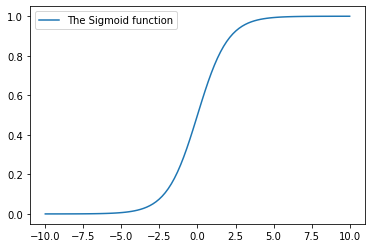

In [1]:
# Plotting a sigmoid function
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))

x_coords = np.linspace(-10, 10, 100) 
plt.plot(x_coords, sigmoid(x_coords))
plt.legend(["The Sigmoid function"])

### 1.2 The Log-Likelihood as loss function

We will use a probabilistic interpretation of the sigmoid prediction function (as a **Bernouilli distribution**). Let 
$$
\begin{equation}
    \begin{split}
        p(y=1 | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta), \\ 
        p(y=0 | \mathbf{x}; \theta) &= 1 - f(\mathbf{x}; \theta). 
    \end{split}
\end{equation}
$$

Therefore, the **likelihood**, $L(\theta)$, is defined as 

$$

\begin{equation}
    \begin{split} 
        L(\theta) = p(y | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta)^y (1 - f(\mathbf{x}; \theta))^{(1-y)}, \\
        &= \Pi_{i=1}^n f(\mathbf{x}_i; \theta)^{y_i} (1 - f(\mathbf{x}_i; \theta))^{(1-y_i)}. \\
    \end{split}
\end{equation}
$$


The **Log-likelihood** is 
$$ 
\begin{equation}
    \begin{split} 
    \log L(\theta) &=  \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)), \\
    &= \sum_{i=1}^n y_i \log(\exp(- (\mathbf{x}_i^T \mathbf{w} + b )) + 1) + (1 - y_i) \log(\exp(\mathbf{x}_i^T \mathbf{w} + b) + 1)\\
    \end{split}
\end{equation}  
$$

The standard logistic regression loss function is therefore given by the **negative log-likelihood**
$$\mathcal{L}(\theta) = - \log L(\theta).$$

We now, need to compute the gradient of the loss w.r.t the parameters $(\mathbf{w}, b)$.

$$
\begin{equation}
    \begin{split} 
            \nabla_{\mathbf{w}} \mathcal{L}(\theta) &= - \sum_{i=1}^n y_i \nabla_{\mathbf{w}}  \log f(\mathbf{x}_i; \theta) + (1-y_i) \nabla_{\mathbf{w}}  \log (1 - f(\mathbf{x}_i; \theta)), \\
            &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big)\nabla_{\mathbf{w}} f(\mathbf{x}_i; \theta), \\
            &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{\mathbf{w}} (\mathbf{x}_i^T\mathbf{w} + b), \\
            &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \ \mathbf{x}_i , \\
            &= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)  \mathbf{x}_i
    \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split} 
        \nabla_{b} \mathcal{L}(\theta) &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{b} (\mathbf{x}_i^T\mathbf{w} + b), \\
        &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) , \\
        &= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)
    \end{split}
\end{equation} 
$$

#### Toy example of a Logistic Regressor

1. **Generate a random binary dataset**

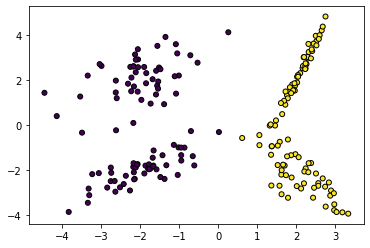

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

# we create 50 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=2, class_sep=2.0)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

2. **Designing the Logistic Model**

In [3]:
import numpy as np

class MyBinaryLogisticRegression:
    def __init__(self, n_feats, n_iter, lr, regul='l2', r_lambda=0.1):
        """
        A class for binary logistic regression model
        
        n_feats: (integer) 
            Dimension of the input data
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        """
        self.w = np.zeros((1, n_feats))
        self.b = 0

        self.n_feats = n_feats
        self.n_iter = n_iter
        self.lr = lr
        self.r_lambda = r_lambda
        self.regul = regul
        
        self.losses = []
        self.grads = []

    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*(np.sum((y*np.log(probs)) + ((1-y)*(np.log(1-probs)))))

        # computing the gradient 
        dw = (1/m)*(np.dot((probs - y), X)) 
        
        if self.regul == "l2":
            dw += 2*self.r_lambda* self.w # adding l2 regularization
        elif self.regul == 'l1':
            dw + self.r_lambda * np.sign(self.w) # adding l1 regularization
            
        db = (1/m)*(np.sum(probs - y))

        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):            
        return 1./(1. + np.exp(-np.dot(self.w, X.T) - self.b))
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            if (i % 10 == 0):
                print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return activ >= 0.5 # np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

3. **Instanciating the model and training**

In [4]:
my_clf = MyBinaryLogisticRegression(n_feats=2, n_iter=100, lr=0.1, r_lambda=0.01)
print(X.shape, y.shape)
my_clf.fit(X, y)

(200, 2) (200,)
Standard Logistic Regression: Iter 0, Cost 0.6931471805599452
Standard Logistic Regression: Iter 10, Cost 0.2542989009626561
Standard Logistic Regression: Iter 20, Cost 0.1611625568957351
Standard Logistic Regression: Iter 30, Cost 0.12225487791610239
Standard Logistic Regression: Iter 40, Cost 0.10089747176280184
Standard Logistic Regression: Iter 50, Cost 0.08738415505958798
Standard Logistic Regression: Iter 60, Cost 0.07805888616671461
Standard Logistic Regression: Iter 70, Cost 0.071237063883419
Standard Logistic Regression: Iter 80, Cost 0.06603354206469617
Standard Logistic Regression: Iter 90, Cost 0.06193802901054237
Standard Logistic Regression: Iter 99, Cost 0.05893634539376782


4. **Plotting the decision boundary of the model**

In [5]:
def print_decision(X, clf, title="Decision Boundary"):
    plt.figure()
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
    plt.title(title)

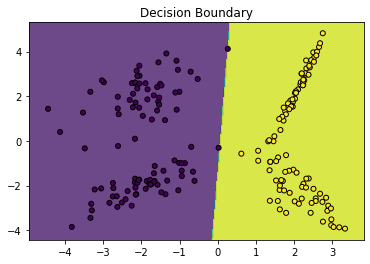

In [6]:
print_decision(X, my_clf)

### 1.3 The regularized Log-Likelihood as loss function

The **regularized** logistic regression loss function consists in assuming that the parameters follow a certain *a priori* distribution.

We then used the **maximum a posteriori (MAP)** estimation to derive the final loss function.

Let $p(\theta)$ be the *a priori*.

The goal is to minimize
$$
\begin{equation}
    \begin{split} 
        \mathcal{L}(\theta) &= - \log L(\theta)p(\theta), \\
        &= - \log L(\theta) - \log p(\theta).
    \end{split}
\end{equation}
$$

1. The $\ell_2$ regularization: the *a priori* is given by ($p$ follows a normal distribution): $$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_2^2)$$
2. The $\ell_1$ regularization: the *a priori* is given by ($p$ follows a laplacian distribution): $$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_1)$$

Therefore, depending on the *a priori* the regularized loss is given by
1. for the $\ell_2$ regularization: 
$$ \mathcal{L}(\theta)  = \overbrace{ -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \lambda \underbrace{\|\mathbf{w}\|_2^2}_{\ell_2-\text{regularization}},$$
2. for the $\ell_1$ regularization:  $$ \mathcal{L}(\theta)  = \overbrace{ -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \lambda \underbrace{\|\mathbf{w}\|_1}_{\ell_1-\text{regularization}}, $$
where $\lambda \in \mathbb{R}$ balances the importance of the terms. 

> Note that, the above two equations can be rewritten as 
$$ \mathcal{L}(\theta)  =  \overbrace{ -\frac{C}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \underbrace{\phi(\theta)}_{\text{regularization }(\ell_2, \ell_1)}, $$ 
where $C \in \mathbb{R}$.

#### Example using the scikit-learn model

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(C=50. / 100 , penalty='l2', tol=0.1)
clf.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

score: 1.0, sparsity: 0.0 


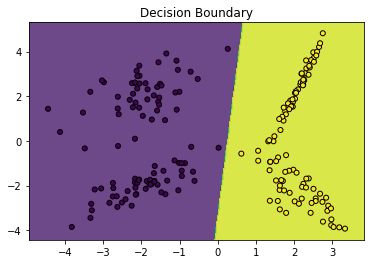

In [9]:
print_decision(X, clf)
print("score: {}, sparsity: {} ".format(clf.score(X, y), np.mean(clf.coef_ == 0) * 100))

## 2. Multi-class classification

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, \mathbf{y_i} \in \{0, 1\}^{C})\}_{i=1}^n$ be our training dataset, where $C$ is the number of classes. The samples are **i.i.d**.

<img src="images/binary_vs_multi_classif.png" width="90%"/>

### 2.1 Formulation

In the case of multi-class tasks, the multinomial logistic regression can be used (*a.k.a.* **softmax regression**). The probability to obtain the class $c$ given an input $\mathbf{x}$ is given by
$$f(\mathbf{x}; \theta)[c] = p(y = c | \mathbf{x}; \theta) = \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})}, $$
where $(\mathbf{w}^{(k)}, b^{(k)})$ are the parameter set dedicated to the $k$-th class.

> Another way of working with multi-class data is to use a **one-versus-all** strategy. In other words, for each class, $c$, we train a binary logistic regressor where we label $c$ as $1$ and the other classes as $0$. And, at test time, we consider the argmax across all the regressors.

Notice that we can retrieve the binary formulation from the multinomial definition. Say we have two class 0 and 1, then 
$p(y = 1 | \mathbf{x}; \theta) = \frac{exp\big( \mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big)}{ exp\big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) + exp\big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)}\big)} = \frac{1 }{1 + exp\Big( \big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)} \big) - \big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) \Big)} = \frac{1 }{1 + exp \Big(  \mathbf{x}^T \big(\mathbf{w}^{(0)} - \mathbf{w}^{(1)} \big) +  \big(b^{(0)} -  b^{(1)}\big) \Big)}.$

> **N.B.**: The sofmax function is defined as 
$ \mathbf{t} \in \mathbf{R}^C \mapsto \text{softmax} (\mathbf{t}) = \frac{1 }{\sum_{k=1}^C e^{\mathbf{t}[k]}}\Big[e^{ \mathbf{t}[1]}, e^{ \mathbf{t}[2]}, \cdots, e^{ \mathbf{t}[C] }\Big] $

#### 2.1.2 The Loss function

Given a data point $\mathbf{x}$, the likelihood is given by
$$
 L(\theta) = p(y|\mathbf{x}; \theta) = \Pi_{k=1}^C p(y = k|\mathbf{x}; \theta)^{\mathbb{1}\{y=k\}},
$$

where $\mathbb{1}\{\cdot\}$ is the indicator function.

And the negative log-likelihood, our multi-class loss function, is
$$
 \mathcal{L}(\theta) = -\log L(\theta) = p(y|\mathbf{x}; \theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta).
$$

> Note we can add an additional regularization term. Using the same derivation given in the binary logistic section, we obtain the new regularized loss as
$$
 \mathcal{L}(\theta) = -\log L(\theta) p(\theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) + \lambda \phi(\theta),
$$
where $\phi$ can be any regularization function including the $\ell_2$-norm or the $\ell_1$-norm.

The gradient w.r.t. to the $c$-th parameter $\mathbf{w}^{(c)}$ is
$$
\begin{equation}
    \begin{split} 
         \nabla_{\mathbf{w}^{(c)}} - \log L(\theta) &= - \nabla_{\mathbf{w}^{(c)}}  \Big(\sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) \Big),\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} p(y = c|\mathbf{x}; \theta) ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)\frac{\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) }{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)  \frac{\mathbf{x} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})^2 \mathbf{x}}{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \big( \mathbf{x} p(y = c|\mathbf{x}; \theta) - p(y = c|\mathbf{x}; \theta)^2\mathbf{x} \big) ,\\
         &=-\big({\mathbb{1}\{y=c\}} +  p(y = c|\mathbf{x}; \theta) \big) \mathbf{x}.
    \end{split}
\end{equation}
$$

### 2.2 Example  (MNIST: handwritten digits classification)

The main objective is to predict the digit inside an input image.
<img src="images/mnist_goal.png" width="40%">

The practical workflow is depicted below. 

1. Flattening the image to obtain a vector (*a.k.a* the **the feature vector**)
2. Applying the model
3. Using the argmax to retrieve the final output

<img src="images/mnist_practical.png" width="40%">

#### Import the important libraries
- **fetch_openml** will be used to retrieve the dataset
- **LogisticRegression** is the scikit-learn class for this type of model
- **train_test_split** is used to split dataset into 2 folds (train and test) eventually 3 with additional validation set
- **StandardScaler** is used to normalize the data by substracting the mean and dividing by the variance
- **check_random_state** is used to randomly permutate the data

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


#### We fix the number of training sample 

In [11]:
train_samples = 5000

#### Data acquisition and preprocesing
1. Load the MNIST data from https://www.openml.org/d/554
2. Shuffling the data randomly
3. Splitting the data into **Train** and **Test** sets
4. Normalizing the data

In [12]:
# Loading the images
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffling part
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Initializing the classifier

In [13]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)

#### Training the classifier

In [14]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

#### Printing some metrics:
- The sparsity level
- The Test score

In [15]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 16.84%
Test score with L1 penalty: 0.8668


**Plotting some test images and there predictions**

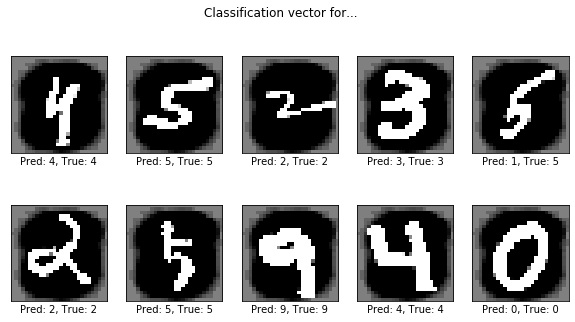

In [16]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    pred_plot = plt.subplot(2, 5, i + 1)
    
    pred = clf.predict(X_test[i:i+1])
    
    pred_plot.imshow(X_test[i].reshape(28, 28), interpolation='nearest', 
                     cmap=plt.cm.gray, vmin=-scale, vmax=scale)
    pred_plot.set_xticks(())
    pred_plot.set_yticks(())
    pred_plot.set_xlabel('Pred: %s, True: %s' %(int(pred[0]), y_test[i]))
plt.suptitle('Classification vector for...')
plt.show()

#### Plotting the learned parameters

In [17]:
def plot_coefs(coef, title='Classification vector for...'):
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l1_plot.set_xlabel('Class %i' % i)
    plt.suptitle(title)
    plt.show()

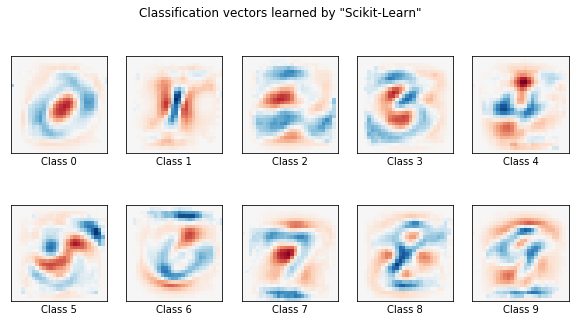

In [18]:
plot_coefs(clf.coef_.copy(), title='Classification vectors learned by "Scikit-Learn"')

### 2.3 Coding a Multi-Class Logistic Regressor  (test on MNIST)

In [19]:
class MyMultiClassLogisticRegression:
    def __init__(self, n_iter, lr, regul="l2", r_lambda=0.1):
        """
        A class for multiclass logistic regression model
         
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate  
        """
        
        self.n_iter = n_iter
        self.lr = lr
        self.regul = regul
        self.r_lambda = r_lambda 
        
        self.losses = []
        self.grads = []
    
    def init_params(self, n_feats, n_class):
        self.W = np.zeros((n_class, n_feats))
        self.b = np.zeros(n_class)

    def _optimize(self, X, y):
        """
            Computing the loss and the gradients
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples x n_class)
                one-hot endoded representation for each target 
        """
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*np.sum(y*np.log(probs))
        
        # ( \mathbb{1}\{y=c\} +  f(\mathbf{x}; \theta)[c] ) \mathbf{x}
        # computing the gradient 
        dw = []; db = []
        for i in range(self.W.shape[0]):
            dw.append(-(1/m) * (np.dot((probs[:, i] + y[:, i]), X)))  
            
            if self.regul=='l2':
                dw[-1] += 2*self.r_lambda*self.W[i] # adding l2 regularization
            elif self.regul == 'l1':
                dw[-1] += self.r_lambda*np.sign(self.W[i]) # adding l1 regularization
                
            db.append(-(1/m) * np.sum(probs[:, i] - y[:, i]) )

        grads = {"dLdw": np.array(dw), "dLdb": np.array(db)}

        return grads, cost

    def activation(self, X):      
        vect_of_eponents = np.exp(np.dot(X, self.W.T) + self.b) 
        return vect_of_eponents/ np.tile(np.sum(vect_of_eponents, 1), (self.W.shape[0],1)).T
    
    def one_hot_encode(self, y):
        v = np.zeros((y.size, len(np.unique(y))))
        v[np.arange(y.size), y.astype(int)] = 1
        return v
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        self.init_params(X.shape[1], len(np.unique(y)))
        one_hot_labels = self.one_hot_encode(y) 
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, one_hot_labels)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.W = self.W - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            if (i % 10 == 0):
                print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

In [20]:
my_mclr = MyMultiClassLogisticRegression(n_iter=100, lr=0.001, regul="l2", r_lambda=0.1)

In [21]:
print(X_train.shape, y_train.shape)
my_mclr.fit(X_train, y_train.astype(int))

(5000, 784) (5000,)
Multiclass Logistic Regression: Iter 0, Cost 2.3025850929940455
Multiclass Logistic Regression: Iter 10, Cost 2.2203370802842803
Multiclass Logistic Regression: Iter 20, Cost 2.1384004272995054
Multiclass Logistic Regression: Iter 30, Cost 2.0569581768019587
Multiclass Logistic Regression: Iter 40, Cost 1.9762544234701427
Multiclass Logistic Regression: Iter 50, Cost 1.8966116017552497
Multiclass Logistic Regression: Iter 60, Cost 1.818443180574398
Multiclass Logistic Regression: Iter 70, Cost 1.7422508208117835
Multiclass Logistic Regression: Iter 80, Cost 1.6685949187138176
Multiclass Logistic Regression: Iter 90, Cost 1.5980382667030246
Multiclass Logistic Regression: Iter 99, Cost 1.5376024663994716


In [22]:
sparsity = np.mean(my_mclr.W == 0) * 100
score = my_mclr.score(X_test, y_test.astype(int))

print("Sparsity: %.2f%%" % sparsity)
print("Test score: %.4f" % score)

Sparsity: 16.84%
Test score: 0.7101


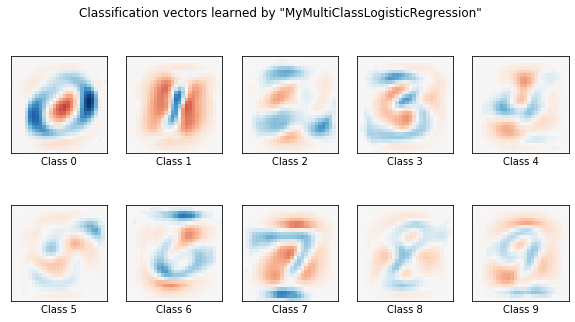

In [23]:
plot_coefs(my_mclr.W.copy(), title='Classification vectors learned by "MyMultiClassLogisticRegression"')

Multiclass Logistic Regression: Iter 0, Cost 1.3862943611198904
Multiclass Logistic Regression: Iter 10, Cost 1.3644986577538774
Multiclass Logistic Regression: Iter 20, Cost 1.3427532376185332
Multiclass Logistic Regression: Iter 30, Cost 1.321064955283582
Multiclass Logistic Regression: Iter 40, Cost 1.2994408667181148
Multiclass Logistic Regression: Iter 50, Cost 1.2778882199677493
Multiclass Logistic Regression: Iter 60, Cost 1.2564144442885337
Multiclass Logistic Regression: Iter 70, Cost 1.2350271377010305
Multiclass Logistic Regression: Iter 80, Cost 1.2137340529422136
Multiclass Logistic Regression: Iter 90, Cost 1.1925430818088123
Multiclass Logistic Regression: Iter 99, Cost 1.1735651359629335


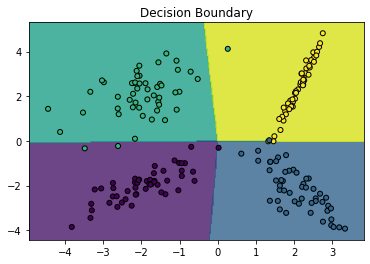

In [24]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_classes=4, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1, class_sep=2.0)
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
my_mclr.fit(X, y)
print_decision(X, my_mclr)

## 3. Linear Support Vector Machine (SVM)

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{-1, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

> Recall that in the Logistic regression model, the prediction function was defined using the sigmoid as **activation** function: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))} \overset{\text{def}}{=} sigmoid( \langle \mathbf{x}, \mathbf{w} \rangle + b)).$$

In this section, we will use the sign function as activation function: 
$$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = sign(\langle \mathbf{x}, \mathbf{w} \rangle + b).$$

Therefore, the sample $\mathbf{x}_i$ is well classified iif $y_i (\langle x, w \rangle + b ) \ge 1$.

We have seen that the Logistic Regression model can be used to find a hyperplane that separates the data. 

> However, we can notice that, actually have infinite number of hyperplanes that work fine on the dataset. The question is which one to choose?

> The idea introduce by Vapnik, in the 90's, is to say a good hyperplane should be robust to small perturbations in the training set. 

>In other words, we should maximize the so called **margin** defined as the minimum distance between all the samples and the hyperplane. See the figure below for illustration.

<img src="images/intro_to_margin.png">

### 3.1 Hard SVM

Suppose our dataset is **separable**, that is, there exists a hyperplane that perfectly seperate the classes.

In such separable case, let $\mathbf{x}_1$  be one of the closest positively labeled (with $y_1 = 1$) points to the hyperplane (if not the closest) and $\mathbf{x}_2$ is chosen similarly among the negatively labeled points. 

Upon normalizing with a constant, we can write
$$
\begin{equation}
\begin{split}
    \langle \mathbf{x}_1, \mathbf{w} \rangle + b &= 1, \\
    \langle \mathbf{x}_2, \mathbf{w} \rangle + b &= -1. \\
\end{split}
\end{equation}
$$

<img src="images/hard_svm.png">

**Note**: The samples that satifies $y_i  \langle \mathbf{x}_i , \mathbf{w} \rangle + b = 1 $ are the so called **support vectors**. 

Using the notation given in the above Figure, we have:
$$
\begin{equation}
\begin{split}
 \langle \frac{\mathbf{w}}{\|\mathbf{w}\|_2^2},  \mathbf{x}_1 - \mathbf{x}_2 \rangle &= 2Margin = d, \\
  \langle\mathbf{x}_1 - \mathbf{x}_2 , \mathbf{w} \rangle &= 2, \\
     &  \Rightarrow Margin = \frac{1}{\|\mathbf{w} \|_2^2} & \\
\end{split}
\end{equation}
$$

Therefore, maximizing the margin is equivalent to minimizing the $\ell_2$-norm of $\mathbf{w}$.

> Finally, the (*primal*) hard SVM optimization problem is given by
$$
\begin{equation}
    \begin{split}
        \text{minimize } & \frac{1}{2} \| \mathbf{w}\|_2^2  \\
        & \text{s.t.} \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \le 0 \quad \forall i \in \{1, \cdots, n\}.
    \end{split}
\end{equation}
$$

> And the Lagrangian $L_H$ of the Hard SVM is given by
$$
\begin{equation} 
        L_H(\mathbf{w}, b, \alpha) =   \frac{1}{2} \| \mathbf{w}\|_2^2  + \sum_{i=1}^n \alpha_i\big( 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big),
\end{equation}
$$where the $\alpha_i$'s are the so called **Lagrangian multipliers**.

We can therefore solve this convex optimization problem. However, we made a strong assumption that the dataset is separable while in practice this is generally not the case. We shall now introduce the Soft SVM that handles this assumption issue.

### 3.2 Soft SVM

Now we don't any separability conditions on the dataset, and our main goals are:
1. maximize the margin
2. minimize an error related to the number of wrongly classified samples

Vapnik defined the error in the second point as: the distance needed to move wrongly classified point to get it on the correct side of the hyperplane.

To do so, we introduce new variables, $\xi_i$ is the distance needed to move the $i$-th sample to the correct side of the hyperplane. Note that $\xi_i = 0$ if the sample is well classified.  See the figure below for illustration.

<img src="images/soft_svm.png">

Formally, this consists in relaxing our constrains by adding the new variables. The new constrains are
$$
\begin{equation}
    \begin{split}
        y_i (\langle \mathbf{x}, \mathbf{w} \rangle + b) &\ge 1 - \xi_i \quad \forall i \in \{1, \cdots, n\},\\
        \xi_i &\ge 0
    \end{split}
\end{equation}
$$

> The (*primal*) Soft SVM optimization problem is given by
$$
\begin{equation}
    \begin{split}
        \underset{\mathbf{w}, \xi}{\text{minimize }} && \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \xi_i & \\
        & \text{s.t. } & \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) &\le \xi_i \quad \forall i \in \{1, \cdots, n\}\\
        & &\quad \xi_i  \ge 0 \quad \forall i \in \{1, \cdots, n\},
    \end{split}
\end{equation}
$$ where $\xi = [\xi_1, \cdots, \xi_n]$.

Suppose $\mathbf{w}$ and $b$ are fixed. We  want that, $ \xi_i \ge 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b), \ \forall i$, and $\xi_i \ge 0$. Therefore, we have:
$$
\xi_i = \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big).
$$

> The final (*unconstrained*) Soft SVM optimization problem is 
$$
\underset{\mathbf{w}, b}{\text{minimize }} \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \underbrace{\max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big)}_{\text{The Hinge Loss}}.
$$

### 3.3 Optimization

#### 3.3.1  Optmization of the unconstrained Soft SVM problem

Let $\mathcal{L}$ be our loss function: $$\mathcal{L}(\theta = \{\mathbf{w}, b\}) = \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big).$$

This loss is being convex (sum of two convex functions), the standard gradient descent technique can be efficiently applied to minimize it. Let's compute the gradients w.r.t to the parameters.

$$
\begin{equation}
    \begin{split}
        \nabla_{\mathbf{w}}  \mathcal{L}(\theta) &= \frac{1}{n} \sum_{i=1}^n \begin{cases}
             \mathbf{w}  & \text{if } \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) = 0 \\
             \mathbf{w} - C  y_i \mathbf{x}_i & \text{otherwise }
       \end{cases}, \\       
        \nabla_{b}  \mathcal{L}(\theta) &= \frac{1}{n} \sum_{i=1}^n \begin{cases}
             0  & \text{if } \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) = 0 \\
             -C y_i  & \text{otherwise }
       \end{cases}.
    \end{split}
\end{equation}
$$

#### 3.3.2 Optimization of the constrained Soft SVM problem using the dual

> Recall that the constrained Soft SVM Problem (the *primal*) is defined as
$$
\begin{equation}
    \begin{split}
        \underset{\mathbf{w}, \xi}{\text{minimize }} && \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \xi_i & \\
        & \text{s.t. } & \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) &\le \xi_i \quad \forall i \in \{1, \cdots, n\}\\
        & &\quad \xi_i  \ge 0 \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation}
$$

The Lagrangian $L_S$ of the Soft SVM is given by:
$$
    L_S(\mathbf{w}, b, \xi, \alpha) =  \frac{1}{2} \| \mathbf{w}\|_2^2  +  C \sum_{i=1}^n \xi_i  + \sum_{i=1}^n \alpha_i\big( 1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big).
$$

To obtain the dual formulation, we start by minimizing the Lagrangian $L_S$ w.r.t. the *primal* variables $(\mathbf{w}, b, \xi)$. 

By setting $\nabla_{\mathbf{w}} L_S(\mathbf{w}, b, \xi, \alpha) = 0$, $\nabla_{b} L_S(\mathbf{w}, b, \xi, \alpha) = 0$, and $\nabla_{\xi} L_S(\mathbf{w}, b, \xi, \alpha) = 0$, (parts of the **KKT conditions**) we obtain

$$
\begin{equation}
    \begin{split}
        \nabla_{\mathbf{w}}   L_S(\mathbf{w}, b, \xi, \alpha) &=  \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i &= 0, \\       
        \nabla_{b}   L_S(\mathbf{w}, b, \xi, \alpha)&= - \sum_{i=1}^n \alpha_i y_i &= 0, \\
        \nabla_{\xi_i}   L_S(\mathbf{w}, b, \xi, \alpha) &=  C - \alpha_i &= 0.\\
    \end{split}
\end{equation}
$$

We then obtain the following equations
$$
\begin{equation}
    \begin{split}
        \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i &= \mathbf{w}, \\       
         \sum_{i=1}^n \alpha_i y_i &= 0, \\
         \alpha_i &= C.\\
    \end{split}
\end{equation}
$$

Notice that the third equality on the $\alpha_i$'s implies that $0 \le \alpha_i \le C$.

> Note the other equations derived from the *KKT conditions* state that
$$
\begin{equation}
    \begin{split}
        \alpha_i \big(1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) &= 0., \\      
         1 - \xi_i  - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b)  & \le 0, \\         
         \alpha_i &\ge 0.\\
    \end{split}
\end{equation}
$$
Therefore, if $\alpha_i > 0$ then $\big(1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) = 0$. Meaning that only the Lagragian multipliers of the support vectors are not null. 
**Hence, the obtained $\mathbf{w}$ is a linear combination of the support vectors.**

To obtain the Dual, we plugin the previously obtain equations in the $L_S$ formulation.

> The Dual optimization problem is given by 
$$
\begin{equation}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i    - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j \langle \mathbf{x}_i, \mathbf{x}_j \rangle\\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation}
$$

This Dual problem can be solved by using various optimization techniques including:
- quadratic optimization techniques,
- Coordinate descent techniques, 
- The Sequential Minimal Optimization Algorithm.

### 3.4 Example 1 (plotting the margin)

#### 3.4.1 Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#### 3.4.2 Using the Scikit-Learn *make_blobs* to randomly generate a toy dataset

In [26]:
X, y = make_blobs(n_samples=40, centers=2)

#### 3.4.3 Creating the SVM classifier (SVC) and training

In [27]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 3.4.4 Plotting the boundaries,  the support vectors, and the margins 

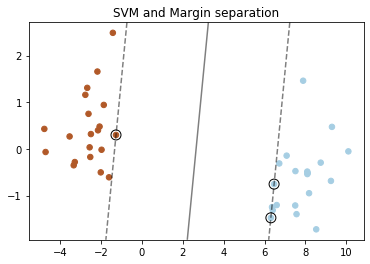

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM and Margin separation")
plt.show()

### 3.5. Coding our SVM (using unconstrained Soft SVM formulation)

#### 3.5.1 Main class of the model

In [29]:
class MyLinearSVM:
    def __init__(self, n_iter, lr, C=0.1):
        """
        A class for linear SVM model
        
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        C: (float)
            regularization weight
        """ 
 
        self.n_iter = n_iter
        self.lr = lr
        self.C = C 
        
        self.losses = []
        self.grads = []

    def init_params(self, n_feats):
        self.w = np.zeros((1, n_feats))
        self.b = 0

    def _optimize(self, X, y):
        m = X.shape[0]
    
        dist = 1. - y*(np.dot(self.w, X.T) + self.b)
        dist[dist < 0] = 0
        # cost function 
        cost = 0.5 * np.dot(self.w, self.w.T) + self.C * np.mean(dist)
        
        # computing the gradient 
        dw = 0; db = 0
        for i, d in enumerate(np.squeeze(dist)):
            if d != 0:
                dw += self.w - self.C* np.squeeze(y)[i]* X[i]
                db +=   -self.C* np.squeeze(y)[i]
            else:
                dw += self.w 
                db +=  0
        
        dw *=  (1./m)
        db *=  (1./m)
        
        grads = {"dLdw": dw, "dLdb": db}
        
        return grads, cost

    def activation(self, X):            
        return np.sign(np.dot(self.w, X.T) + self.b)
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        assert len(np.unique(y)) == 2, "More than two labels in y %s"%(np.unique(y))
        labels = list(np.squeeze(np.unique(y)))
        remapped_labels = y
        if labels != [-1, 1]:
            remapped_labels = np.zeros_like(y)
            remapped_labels[y == np.unique(y)[0]] = 1
            remapped_labels[y == np.unique(y)[1]] = -1
        
        self.init_params(X.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, remapped_labels)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

#### 3.5.2 Training the model and printing its decision boundary

Standard Logistic Regression: Iter 9999, Cost [[0.02572552]]


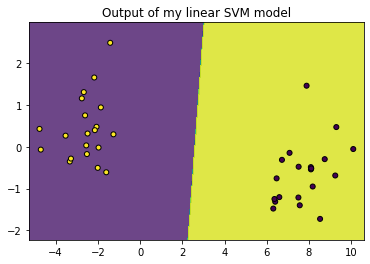

In [30]:
my_lsvm = MyLinearSVM(10000, 0.01, 0.1)
my_lsvm.fit(X, y)
print_decision(X, my_lsvm, "Output of my linear SVM model")

In [31]:
my_blr = MyBinaryLogisticRegression(2, 10000, 0.1, r_lambda=0)

Standard Logistic Regression: Iter 0, Cost 0.6931471805599454
Standard Logistic Regression: Iter 10, Cost 0.09405137857554091
Standard Logistic Regression: Iter 20, Cost 0.06086006205351731
Standard Logistic Regression: Iter 30, Cost 0.045804121713201335
Standard Logistic Regression: Iter 40, Cost 0.03697757735308399
Standard Logistic Regression: Iter 50, Cost 0.031118922992590788
Standard Logistic Regression: Iter 60, Cost 0.0269255647401078
Standard Logistic Regression: Iter 70, Cost 0.023766304648217704
Standard Logistic Regression: Iter 80, Cost 0.02129567013602555
Standard Logistic Regression: Iter 90, Cost 0.019307805323473405
Standard Logistic Regression: Iter 100, Cost 0.017672055536578267
Standard Logistic Regression: Iter 110, Cost 0.016301335971630165
Standard Logistic Regression: Iter 120, Cost 0.015135283934994094
Standard Logistic Regression: Iter 130, Cost 0.01413069402135389
Standard Logistic Regression: Iter 140, Cost 0.013255800462513746
Standard Logistic Regression: 

Standard Logistic Regression: Iter 2050, Cost 0.0011656955546606757
Standard Logistic Regression: Iter 2060, Cost 0.001160440048133294
Standard Logistic Regression: Iter 2070, Cost 0.0011552332452047745
Standard Logistic Regression: Iter 2080, Cost 0.0011500744641088313
Standard Logistic Regression: Iter 2090, Cost 0.0011449630358209314
Standard Logistic Regression: Iter 2100, Cost 0.0011398983037609956
Standard Logistic Regression: Iter 2110, Cost 0.0011348796235042442
Standard Logistic Regression: Iter 2120, Cost 0.0011299063625002125
Standard Logistic Regression: Iter 2130, Cost 0.0011249778997995507
Standard Logistic Regression: Iter 2140, Cost 0.0011200936257882348
Standard Logistic Regression: Iter 2150, Cost 0.0011152529419292425
Standard Logistic Regression: Iter 2160, Cost 0.0011104552605110541
Standard Logistic Regression: Iter 2170, Cost 0.0011057000044032987
Standard Logistic Regression: Iter 2180, Cost 0.0011009866068185986
Standard Logistic Regression: Iter 2190, Cost 0.0

Standard Logistic Regression: Iter 3280, Cost 0.0007526458728117467
Standard Logistic Regression: Iter 3290, Cost 0.0007505113324838183
Standard Logistic Regression: Iter 3300, Cost 0.0007483892353350925
Standard Logistic Regression: Iter 3310, Cost 0.0007462794716589635
Standard Logistic Regression: Iter 3320, Cost 0.0007441819330423288
Standard Logistic Regression: Iter 3330, Cost 0.000742096512346239
Standard Logistic Regression: Iter 3340, Cost 0.0007400231036874183
Standard Logistic Regression: Iter 3350, Cost 0.0007379616024197089
Standard Logistic Regression: Iter 3360, Cost 0.0007359119051159723
Standard Logistic Regression: Iter 3370, Cost 0.0007338739095504955
Standard Logistic Regression: Iter 3380, Cost 0.0007318475146813371
Standard Logistic Regression: Iter 3390, Cost 0.0007298326206332818
Standard Logistic Regression: Iter 3400, Cost 0.0007278291286809654
Standard Logistic Regression: Iter 3410, Cost 0.0007258369412323936
Standard Logistic Regression: Iter 3420, Cost 0.0

Standard Logistic Regression: Iter 4580, Cost 0.0005509475905919984
Standard Logistic Regression: Iter 4590, Cost 0.0005498242085091494
Standard Logistic Regression: Iter 4600, Cost 0.0005487055324797402
Standard Logistic Regression: Iter 4610, Cost 0.0005475915326735979
Standard Logistic Regression: Iter 4620, Cost 0.0005464821795136176
Standard Logistic Regression: Iter 4630, Cost 0.0005453774436729624
Standard Logistic Regression: Iter 4640, Cost 0.0005442772960725209
Standard Logistic Regression: Iter 4650, Cost 0.0005431817078781948
Standard Logistic Regression: Iter 4660, Cost 0.0005420906504983403
Standard Logistic Regression: Iter 4670, Cost 0.0005410040955812945
Standard Logistic Regression: Iter 4680, Cost 0.0005399220150126629
Standard Logistic Regression: Iter 4690, Cost 0.000538844380913101
Standard Logistic Regression: Iter 4700, Cost 0.0005377711656355754
Standard Logistic Regression: Iter 4710, Cost 0.0005367023417632042
Standard Logistic Regression: Iter 4720, Cost 0.0

Standard Logistic Regression: Iter 5820, Cost 0.0004401764673238192
Standard Logistic Regression: Iter 5830, Cost 0.00043946835870340394
Standard Logistic Regression: Iter 5840, Cost 0.00043876258929865755
Standard Logistic Regression: Iter 5850, Cost 0.00043805914741516474
Standard Logistic Regression: Iter 5860, Cost 0.00043735802143675677
Standard Logistic Regression: Iter 5870, Cost 0.00043665919982485354
Standard Logistic Regression: Iter 5880, Cost 0.00043596267111783196
Standard Logistic Regression: Iter 5890, Cost 0.000435268423930418
Standard Logistic Regression: Iter 5900, Cost 0.00043457644695294383
Standard Logistic Regression: Iter 5910, Cost 0.0004338867289508374
Standard Logistic Regression: Iter 5920, Cost 0.00043319925876386894
Standard Logistic Regression: Iter 5930, Cost 0.0004325140253056654
Standard Logistic Regression: Iter 5940, Cost 0.0004318310175630508
Standard Logistic Regression: Iter 5950, Cost 0.00043115022459538693
Standard Logistic Regression: Iter 5960,

Standard Logistic Regression: Iter 7550, Cost 0.0003447564999825999
Standard Logistic Regression: Iter 7560, Cost 0.0003443278545532693
Standard Logistic Regression: Iter 7570, Cost 0.0003439003028259536
Standard Logistic Regression: Iter 7580, Cost 0.0003434738405772347
Standard Logistic Regression: Iter 7590, Cost 0.0003430484636056039
Standard Logistic Regression: Iter 7600, Cost 0.000342624167731167
Standard Logistic Regression: Iter 7610, Cost 0.0003422009487956261
Standard Logistic Regression: Iter 7620, Cost 0.0003417788026620825
Standard Logistic Regression: Iter 7630, Cost 0.0003413577252148882
Standard Logistic Regression: Iter 7640, Cost 0.00034093771235956986
Standard Logistic Regression: Iter 7650, Cost 0.0003405187600226621
Standard Logistic Regression: Iter 7660, Cost 0.0003401008641515393
Standard Logistic Regression: Iter 7670, Cost 0.00033968402071431273
Standard Logistic Regression: Iter 7680, Cost 0.00033926822569970436
Standard Logistic Regression: Iter 7690, Cost 

Standard Logistic Regression: Iter 9770, Cost 0.0002705059326675582
Standard Logistic Regression: Iter 9780, Cost 0.00027024538760745184
Standard Logistic Regression: Iter 9790, Cost 0.0002699853571682122
Standard Logistic Regression: Iter 9800, Cost 0.000269725839811531
Standard Logistic Regression: Iter 9810, Cost 0.00026946683400532975
Standard Logistic Regression: Iter 9820, Cost 0.0002692083382235486
Standard Logistic Regression: Iter 9830, Cost 0.0002689503509463238
Standard Logistic Regression: Iter 9840, Cost 0.00026869287065980164
Standard Logistic Regression: Iter 9850, Cost 0.00026843589585618803
Standard Logistic Regression: Iter 9860, Cost 0.00026817942503369054
Standard Logistic Regression: Iter 9870, Cost 0.00026792345669645365
Standard Logistic Regression: Iter 9880, Cost 0.0002676679893546065
Standard Logistic Regression: Iter 9890, Cost 0.00026741302152419577
Standard Logistic Regression: Iter 9900, Cost 0.00026715855172714377
Standard Logistic Regression: Iter 9910, 

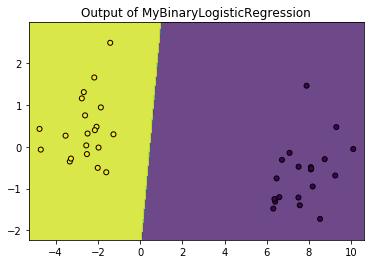

In [32]:
my_blr.fit(X, y)
print_decision(X, my_blr, "Output of MyBinaryLogisticRegression")

## 4. Kernel SVM

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{-1, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

In the previous sections:
- we have seen that we can find a linear classifier that can separate our datasets,
- We added in the SVM section a term that allows us to maximize the margin so as to have robust models.

All these models assumes that the data is actually **linearly separable**. However, in practice the data are generaly not linearly separable.
> Question: **How to adapt our models to handle non-linearly separable datasets?**

The main technique is to transform the data, using a mapping $\Phi$, from the input space to some (high-dimensional) **feature space**. See the figure below for more detail.

<img src="images/kernel_trick_1.png">

### 4.1 Formulation

#### 4.1.2 Introducing the kernels

In the context of  SVMs, the mapping is obtained using **kernels**.

> Recall that the Dual optimization problem of the Soft SVM is given by 
$$
\begin{equation}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i    - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j \langle \mathbf{x}_i, \mathbf{x}_j \rangle\\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation}
$$

To use our transformation trick, we only need to change our dot product between the samples, that is:
> We replace $\langle \mathbf{x}_i, \mathbf{x}_j \rangle$ by $\langle \Phi(\mathbf{x}_i), \Phi(\mathbf{x}_j )\rangle, \ \forall i,j \in \{1, \cdots, n\}.$

> We define the kernel function $k$ as
$$
    (\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') =  \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}' )\rangle.
$$

> We can update our previous Dual to obtain the Kernelized Soft SVM  problem 
$$
\begin{equation}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i  - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j   k(\mathbf{x}_i, \mathbf{x}_j)  \\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation}
$$

Consequently our kernelized prediction functio is of the form
$$
f(\mathbf{x}; \theta = \{\mathbf{w}, b\} ) = sign(\langle \mathbf{x}, \mathbf{w} \rangle + b) = sign( \sum_{i=1}^n \alpha_i y_i k(\mathbf{x}, \mathbf{x}_i) + b),
$$
where we replaced $\mathbf{w}$ by its obtained value $\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i$.

The class of query $\mathbf{x}$ is obtain by computing a **similarity** (given by the kernel) between $\mathbf{x}$ and the labeled training samples $\mathbf{x}_i$.
> Recall that only the $\alpha_i$'s associated to the support vectors are not null.

#### 4.1.2 Mercer's Theorem and importance

> **Valid kernels** Let $k: \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}$. The Mercer's theorem states that for $k$ to be a *valid (Mercer) kernel* (*i.e.* there exists $\Phi$ such that $k(\mathbf{x}, \mathbf{x}') = \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}') \rangle$) it is necessary and sufficient that its corresponding matrix is symetric positive semi-definite, for any $\{\mathbf{x}_i\}_{i=1}^n (n < \infty ).$

Therefore, we no longer need to find the explicit representation $\Phi$ of a kernel $k$ to assess its validity. We only need to verify that a matrix is symetric positive semi-definite.

#### 4.1.3 Example of kernels

- The linear kernel: 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = \langle \mathbf{x}, \mathbf{x}' \rangle, $$
- The polynomial kernel (parameterized by the degree $p$ and constance $c$): 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = (c + \langle \mathbf{x}, \mathbf{x}' \rangle)^p, $$
- The Gaussian kernel (*a.k.a* the radial basis function, RBF) (parameterized by the standard deviation $\sigma$): 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = \exp(-\frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2}). $$

### 4.2 Polynomial Kernel and Interpretation

Let's consider the polynomial kernel with a constant $c=1$: *i.e*
$k(\mathbf{x}, \mathbf{x}') = (1 + \langle \mathbf{x}, \mathbf{x}' \rangle)^p.$

We will now try to retrieve the expression of the transformation $\Phi$ associated to the polynomial kernel $k$.

First we will add a $1$ in the first dimension of the inputs, so as to have $k(\mathbf{x}, \mathbf{x}') = (\langle \mathbf{x}, \mathbf{x}' \rangle)^p,$ with $\mathbf{x} = [1, x_1, \cdots, x_d]$.

>$$
\begin{equation}
    \begin{split}
        k(\mathbf{x}, \mathbf{x}') &=  (\langle \mathbf{x}, \mathbf{x}' \rangle)^p \\
        &= \big(\langle \mathbf{x}, \mathbf{x}' \rangle \big) \cdots \big(\langle \mathbf{x}, \mathbf{x}' \rangle\big) \\
        &= \big(\sum_{k_1=0}^d \mathbf{x}[k_1] \mathbf{x}'[k_1] \big) \cdots \big(\sum_{k_p=0}^d \mathbf{x}[k_p] \mathbf{x}'[k_p] \big) \\
        &= \sum_{\{k_1, \cdots, k_p\} \in \{0, \cdots, d\}^p} \big(\Pi_{i=1}^p \mathbf{x}[k_i] \mathbf{x}'[k_i] \big),\\
        &= \sum_{\vec{k} = \{k_1, \cdots, k_p\} \in \{0, \cdots, d\}^p} \big(\Pi_{i=1}^p \mathbf{x}[k_i]  \big) \big( \Pi_{i=1}^p \mathbf{x}'[k_i] \big),\\
        &= \sum_{ \vec{k} \in \{0, \cdots, d\}^p} \phi_{\vec{k}} (\mathbf{x}) \phi_{\vec{k}} (\mathbf{x}'),\\
        &= \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}') \rangle ,
    \end{split}
\end{equation}
$$
 where $\Phi(\mathbf{x}) = \{\phi_{\vec{k}} (\mathbf{x} )\}_{ \vec{k} \in \{0, \cdots, d\}^p}$.

- Notice that $\text{dim}(\Phi) = (d+1)^p$,
- $\Phi(\mathbf{x})$ is a vector containing all monomial of degree (maximum) $p$.

### 4.3 Gaussian Kernel (Radial Basis Functions, RBF) and Interpretation

In practice the polynomial kernel is very powerful, however, not all dataset can be separate with a polynomial curve. 
- **We need more complex separation curves.** (See the illustration below)

<img src="images/kernel_trick_2bis.png" width="70%" >

Let's consider now the Gaussian Kernel (also known as radial basis functions, RBF): 
*i.e.* $k(\mathbf{x}, \mathbf{x}') = \exp(-\frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2}).$

Notice that if $\frac{\| \mathbf{x} - \mathbf{x}' \|_2}{\sigma} \gg 1 $ then $k( \mathbf{x}, \mathbf{x}) \approx  0$,
- Meaning, the points are $\ell_2$-far away from each other do not interact.

Whereas, if $\frac{\| \mathbf{x} - \mathbf{x}' \|_2}{\sigma} \ll 1$ then $k( \mathbf{x}, \mathbf{x}) \approx 1 - \frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2} $ (the first two terms of the Taylor series of $\exp$),
- In other words,  when the samples are very close, the Gaussian kernel behaves like a $\ell_2$-norm.
- Therefore, if we consider a $d$-dimensional ball of radius $\sigma$, the Gaussian kernel act like a linear separator in that ball. 

We have seen that for points that are close, the Gaussian kernel behaves like a $\ell_2$-norm

<img src="images/kernel_trick_2.png">

### 4.4 Existance of the transformation $\Phi$

We have seen that using certain type of transformation, which can be implicitly obtained from a kernel function, we can **linearize** the problem and find a hyperplane that can separate the data, even for very complex data.

> **Question**: **Can we always find a $\Phi$ that can linearize the our problem?**

> **Answer**: **Yes**, if the samples $\{\mathbf{x}_i\}_{i=1}^n$ are **linearly independent**.

> And, we need $\dim(\Phi) \ge n$ to have a guarantee that the linearization is possible. However, taking a such large dimensional transformation is not a good thing to do, cause we will end up with a very high variance in our estimator (see the bias-variance and estimation theory for more details about this concept). 

### 4.4 Example 1 (using randomly generated non-linearly seperable dataset)

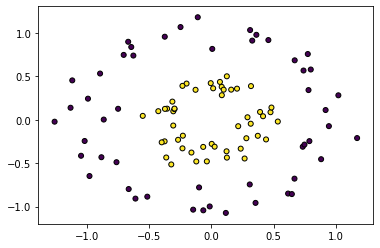

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.4, noise=.1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

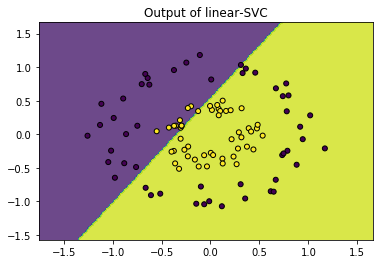

In [34]:
kernel_svm_clf = svm.SVC(kernel='linear', C=100)
kernel_svm_clf.fit(X, y)
print_decision(X, kernel_svm_clf, "Output of linear-SVC")

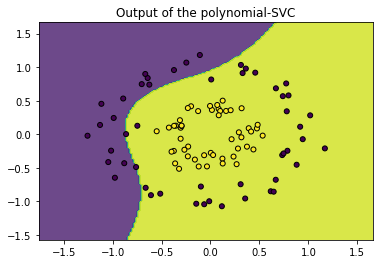

In [35]:
kernel_svm_clf = svm.SVC(kernel='poly', C=100)
kernel_svm_clf.fit(X, y)
print_decision(X, kernel_svm_clf, "Output of the polynomial-SVC")

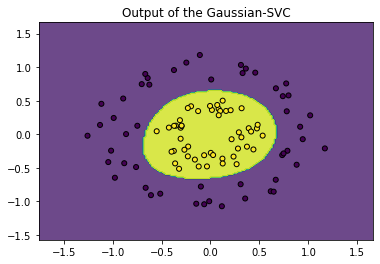

In [36]:
kernel_svm_clf = svm.SVC(kernel='rbf', C=100)
kernel_svm_clf.fit(X, y)
print_decision(X, kernel_svm_clf, "Output of the Gaussian-SVC")

## 5. Decision Trees and Random Forests

## 6. Clustering (K-Means)